## 1. Carga del dataset

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Cargar el dataset
path = "../data/raw/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
df_trafico = pd.read_csv(path)
# Estilo para los graficos
plt.style.use("seaborn-v0_8")

# Se enlistan los nombres de todas las columnas por posibles errorres gramaticales
df_trafico.columns.to_list()

['Flow ID',
 ' Source IP',
 ' Source Port',
 ' Destination IP',
 ' Destination Port',
 ' Protocol',
 ' Timestamp',
 ' Flow Duration',
 ' Total Fwd Packets',
 ' Total Backward Packets',
 'Total Length of Fwd Packets',
 ' Total Length of Bwd Packets',
 ' Fwd Packet Length Max',
 ' Fwd Packet Length Min',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Std',
 'Bwd Packet Length Max',
 ' Bwd Packet Length Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 'Flow Bytes/s',
 ' Flow Packets/s',
 ' Flow IAT Mean',
 ' Flow IAT Std',
 ' Flow IAT Max',
 ' Flow IAT Min',
 'Fwd IAT Total',
 ' Fwd IAT Mean',
 ' Fwd IAT Std',
 ' Fwd IAT Max',
 ' Fwd IAT Min',
 'Bwd IAT Total',
 ' Bwd IAT Mean',
 ' Bwd IAT Std',
 ' Bwd IAT Max',
 ' Bwd IAT Min',
 'Fwd PSH Flags',
 ' Bwd PSH Flags',
 ' Fwd URG Flags',
 ' Bwd URG Flags',
 ' Fwd Header Length',
 ' Bwd Header Length',
 'Fwd Packets/s',
 ' Bwd Packets/s',
 ' Min Packet Length',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std'

## 2. Normalización de columnas

In [2]:
def limpiar_col(col):
    #Convertir a string
    col = str(col)

    #Quitar espacios al inicio y final
    col = col.strip()

    #Reemplazar '.' por '_' (ejemplo de ello el "Lenght.1")
    col = col.replace('.', '_')

    #Reemplazar cualquier secuecnia de espacios por '_'
    col = re.sub(r'\s+','_', col)

    #Convertir a minúsculas
    col = col.lower()

    #Colapsar múltiples underscores
    while "__" in col:
        col = col.replace("__"," _")
    return col

# Aplicar limpieza profesional
df_trafico.columns = [limpiar_col(c) for c in df_trafico.columns]

df_trafico.columns.to_list()

['flow_id',
 'source_ip',
 'source_port',
 'destination_ip',
 'destination_port',
 'protocol',
 'timestamp',
 'flow_duration',
 'total_fwd_packets',
 'total_backward_packets',
 'total_length_of_fwd_packets',
 'total_length_of_bwd_packets',
 'fwd_packet_length_max',
 'fwd_packet_length_min',
 'fwd_packet_length_mean',
 'fwd_packet_length_std',
 'bwd_packet_length_max',
 'bwd_packet_length_min',
 'bwd_packet_length_mean',
 'bwd_packet_length_std',
 'flow_bytes/s',
 'flow_packets/s',
 'flow_iat_mean',
 'flow_iat_std',
 'flow_iat_max',
 'flow_iat_min',
 'fwd_iat_total',
 'fwd_iat_mean',
 'fwd_iat_std',
 'fwd_iat_max',
 'fwd_iat_min',
 'bwd_iat_total',
 'bwd_iat_mean',
 'bwd_iat_std',
 'bwd_iat_max',
 'bwd_iat_min',
 'fwd_psh_flags',
 'bwd_psh_flags',
 'fwd_urg_flags',
 'bwd_urg_flags',
 'fwd_header_length',
 'bwd_header_length',
 'fwd_packets/s',
 'bwd_packets/s',
 'min_packet_length',
 'max_packet_length',
 'packet_length_mean',
 'packet_length_std',
 'packet_length_variance',
 'fin_flag_

## 3. Conversión de timestamp

In [3]:
# Convertir timestamp a datetime
df_trafico["timestamp"] = pd.to_datetime(df_trafico["timestamp"], errors = "coerce")
# Se debe observar el cambio de formato en la fecha
df_trafico.head()

,flow_id,source_ip,source_port,destination_ip,destination_port,protocol,timestamp,flow_duration,total_fwd_packets,total_backward_packets,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,2017-07-07 03:30:00,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,2017-07-07 03:30:00,109,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,2017-07-07 03:30:00,52,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,2017-07-07 03:30:00,34,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,2017-07-07 03:30:00,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


## 4. Ordenamiento

In [4]:
# Eliminar filas con timestamp inválido
df_trafico = df_trafico.dropna(subset=["timestamp"])

In [5]:
# Ordenar cronologicamente
df_trafico = df_trafico.sort_values("timestamp").reset_index(drop=True)

## 5. Creación de métricas

### 5.1. Métricas por flujo 

In [6]:
# Total de paquetes por flujo
df_trafico["total_pkts"] = df_trafico["total_fwd_packets"] + df_trafico["total_backward_packets"]
df_trafico[["timestamp","total_fwd_packets","total_backward_packets", "total_pkts"]].head()

,timestamp,total_fwd_packets,total_backward_packets,total_pkts
0,2017-07-07 03:30:00,2,0,2
1,2017-07-07 03:30:00,4,2,6
2,2017-07-07 03:30:00,4,2,6
3,2017-07-07 03:30:00,2,2,4
4,2017-07-07 03:30:00,2,2,4


In [7]:
# Volumen de bytes por flujo (menos util que total_pkts)
df_trafico["total_bytes"] = df_trafico["total_length_of_fwd_packets"] + df_trafico["total_length_of_bwd_packets"]
df_trafico[["timestamp","total_length_of_fwd_packets","total_length_of_bwd_packets", "total_bytes"]].head()

,timestamp,total_length_of_fwd_packets,total_length_of_bwd_packets,total_bytes
0,2017-07-07 03:30:00,12,0,12
1,2017-07-07 03:30:00,152,190,342
2,2017-07-07 03:30:00,176,344,520
3,2017-07-07 03:30:00,82,114,196
4,2017-07-07 03:30:00,124,248,372


### 5.2. Métricas derivadas temporales

*df_trafico["pkts_rate"] = df_trafico["total_pkts"] / 60*

*df_trafico["bytes_rate"] = df_trafico["total_bytes"] / 60*

*df_trafico["pkts_per_flow"] = df_trafico["total_pkts"] / (df_trafico["num_ddos_flow"] + 1e-6)*


## 6. Resampleo por 30 segundos

In [8]:
# Definir indice temporal
df_trafico_ts = df_trafico.set_index("timestamp")

# Re-sampleo a 30 segundos
df_trafico_30s = (df_trafico_ts.resample("30s").agg({
    
    # Métricas de volumen agregadas
    "total_pkts":"sum",
    "total_bytes":"sum",

    # Métricas por flujo agregadas como promedio
    "flow_bytes/s":"mean",
    "flow_packets/s":"mean",
    "flow_iat_mean":"mean",
    "active_mean":"mean",
    "idle_mean":"mean",

    # Conteo de flujos DD
    "label":lambda x: (x == "DDoS").sum()
}))

# Renombrar columna de conteo DDoS
df_trafico_30s = df_trafico_30s.rename(columns={"label":"num_ddos_flows"})

df_trafico_30s["pkts_rate"] = df_trafico_30s["total_pkts"] 
df_trafico_30s["bytes_rate"] = df_trafico_30s["total_bytes"] 
df_trafico_30s["pkts_per_flow"] = df_trafico_30s["total_pkts"] / (df_trafico_30s["num_ddos_flows"] + 1e-6)

df_trafico_30s

,total_pkts,total_bytes,flow_bytes/s,flow_packets/s,flow_iat_mean,active_mean,idle_mean,num_ddos_flows,pkts_rate,bytes_rate,pkts_per_flow
timestamp,,,,,,,,,,,
2017-07-07 03:30:00,43583,35186405,inf,inf,688403.949098,118579.151464,3.247528e+06,0,43583,35186405,4.358300e+10
2017-07-07 03:30:30,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0.000000e+00
2017-07-07 03:31:00,27517,15873318,inf,inf,686029.721158,71027.774723,3.335710e+06,0,27517,15873318,2.751700e+10
2017-07-07 03:31:30,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0.000000e+00
2017-07-07 03:32:00,3899,1760887,4.675717e+06,9.102111e+04,633851.327242,33379.712885,4.343144e+06,0,3899,1760887,3.899000e+09
...,...,...,...,...,...,...,...,...,...,...,...
2017-07-07 05:00:00,14139,6765110,6.855868e+05,3.488642e+04,837965.355766,57194.198328,2.115612e+06,0,14139,6765110,1.413900e+10
2017-07-07 05:00:30,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0.000000e+00
2017-07-07 05:01:00,1931,251928,1.334574e+06,1.322547e+05,467116.054872,53728.670403,1.266708e+06,0,1931,251928,1.931000e+09


## 7. Asegurar continuidad temporal

In [9]:
# Rango completo esperado de 30 segundos
expected_index = pd.date_range(
    start=df_trafico_30s.index.min(),
    end=df_trafico_30s.index.max(),
    freq="30s"
)

# Segundos que faltan
missing = expected_index.difference(df_trafico_30s.index)
print("30 Segundos faltantes:", len(missing))

# Reindexar para incluir todos los segundos y rellenar con 0
df_trafico_30s = df_trafico_30s.reindex(expected_index)
df_trafico_30s = df_trafico_30s.fillna(0)

df_trafico_30s.index.name = "timestamp"
df_trafico_30s.head()

30 Segundos faltantes: 0


,total_pkts,total_bytes,flow_bytes/s,flow_packets/s,flow_iat_mean,active_mean,idle_mean,num_ddos_flows,pkts_rate,bytes_rate,pkts_per_flow
timestamp,,,,,,,,,,,
2017-07-07 03:30:00,43583,35186405,inf,inf,688403.949098,118579.151464,3.247528e+06,0,43583,35186405,4.358300e+10
2017-07-07 03:30:30,0,0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0,0,0,0.000000e+00
2017-07-07 03:31:00,27517,15873318,inf,inf,686029.721158,71027.774723,3.335710e+06,0,27517,15873318,2.751700e+10
2017-07-07 03:31:30,0,0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0,0,0,0.000000e+00
2017-07-07 03:32:00,3899,1760887,4.675717e+06,9.102111e+04,633851.327242,33379.712885,4.343144e+06,0,3899,1760887,3.899000e+09


## 8. Gráfico de validación

Gráfico exportado exitosamente a:  ../results/01_paquetes_cada_30_segundos.png


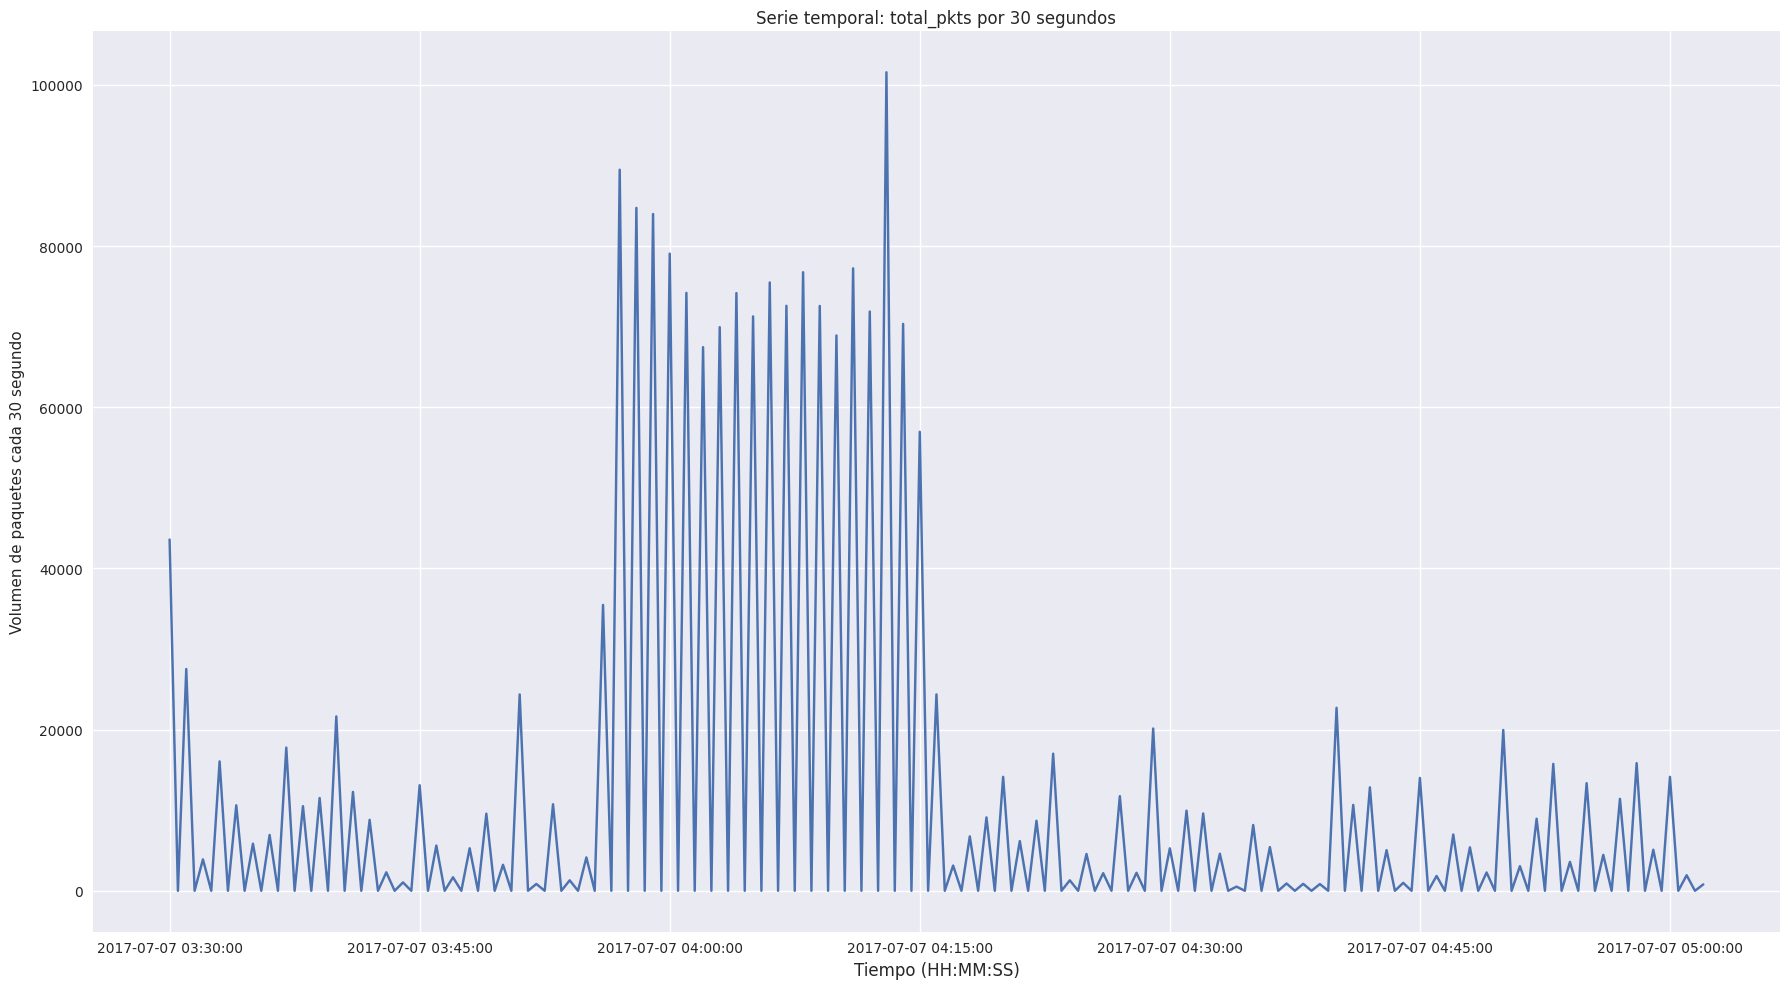

In [11]:
plt.figure(figsize=(18,10))
plt.plot(df_trafico_30s.index, df_trafico_30s["total_pkts"])
plt.title("Serie temporal: total_pkts por 30 segundos")
plt.xlabel("Tiempo (HH:MM:SS)", fontsize=12)
plt.ylabel("Volumen de paquetes cada 30 segundo")

# Formato para visualizar solo la hora en el eje x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Formato para fecha + hora + segundo completa
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

plt.grid(True)
plt.tight_layout()

# Exportar el gráfico
ruta = "../results/01_paquetes_cada_30_segundos.png"
plt.savefig(ruta, dpi = 300, bbox_inches = 'tight',facecolor = 'white',edgecolor = 'none')

print("Gráfico exportado exitosamente a: ", ruta)

plt.show()

## 9. Exportar la serie temporal a un csv

In [12]:
# Exportar la serie temporal
path_salida = "../data/processed/serie_temporal_30s.csv"
df_trafico_30s.to_csv(path_salida)
print("Serie temporal exportada correctamente a: ", path_salida)

# Exportar dataset limpio y nombre de columnas normalizadas
path_salida2 = "../data/processed/dataset_limpio_30s.csv"
df_trafico_ts.to_csv(path_salida2, index=True)
print("Dataset limpio exportado correctamente a: ", path_salida2)

Serie temporal exportada correctamente a:  ../data/processed/serie_temporal_30s.csv
Dataset limpio exportado correctamente a:  ../data/processed/dataset_limpio_30s.csv
